In [1]:
import sys
!{sys.executable} -m pip install plotly

In [2]:
pip install kaleido

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go

## Reading the data
- Dataset from: https://www.kaggle.com/ruchi798/malnutrition-across-the-globe?select=malnutrition-estimates.csv , posted by Ruchi Bhatia
- Data published by UNICEF
- For more information about the data, please check: https://www.kaggle.com/ruchi798/malnutrition-across-the-globe

In [4]:
df_o = pd.read_csv('malnutrition-estimates.csv')
df_o

,Unnamed: 0,ISO code,Country,Survey Year,Year,Income Classification,LDC,LIFD,LLDC or SID2,Survey Sample (N),Severe Wasting,Wasting,Overweight,Stunting,Underweight,Notes,Report Author,Source,Short Source,U5 Population ('000s)
0,0,AFG,AFGHANISTAN,1997,1997,0,1.0,1.0,1.0,"4,846",NaN,18.2,6.5,53.2,44.9,Converted estimates,CIET International,Afghanistan 1997 multiple indicator baseline (...,MICS,3838.877
1,1,AFG,AFGHANISTAN,2004,2004,0,1.0,1.0,1.0,946,3.5,8.6,4.6,59.3,32.9,NaN,"Ministry of Public Health (Afghanistan), UNICE...",Summary report of the national nutrition surve...,NNS,4789.353
2,2,AFG,AFGHANISTAN,2013,2013,0,1.0,1.0,1.0,"44,26,469",4.0,9.5,5.3,40.4,24.6,NaN,"Ministry of Public Health, UNICEF and the Aga ...",Afghanistan National Nutrition Survey 2013.,SMART,5444.573
3,3,AFG,AFGHANISTAN,2018,2018,0,1.0,1.0,1.0,NaN,1.6,5.1,4.1,38.2,19.1,NaN,KIT Royal Tropical Institute,Afghanistan Health Survey 2018,Other,5601.443
4,4,ALB,ALBANIA,1996-98,1997,2,0.0,0.0,0.0,"7,642",NaN,8.1,9.5,20.4,7.1,Converted estimates,"Institute of Public Health, Food and Nutrition...",National study on nutrition in Albania. Instit...,Other,309.225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,919,ZWE,ZIMBABWE,2009,2009,1,0.0,1.0,1.0,"6,196",0.5,2.4,3.5,35.1,11.7,NaN,Zimbabwe National Statistics Agency (ZIMSTAT).,Zimbabwe multiple indicator monitoring survey ...,MICS,1938.279
920,920,ZWE,ZIMBABWE,2010-11,2010,1,0.0,1.0,1.0,"5,414",0.8,3.2,5.8,32.2,10.2,NaN,Zimbabwe National Statistics Agency (ZIMSTAT) ...,Zimbabwe demographic and health survey 2010-11...,DHS,1997.281
921,921,ZWE,ZIMBABWE,2014,2014,1,0.0,1.0,1.0,"9,591",0.7,3.2,3.6,27.6,11.2,NaN,Zimbabwe National Statistics Agency (ZIMSTAT).,Zimbabwe Multiple Indicator Cluster Survey 201...,MICS,2236.182
922,922,ZWE,ZIMBABWE,2015,2015,1,0.0,1.0,1.0,"6,380",1.1,3.3,5.6,27.1,8.5,NaN,Zimbabwe National Statistics Agency; ICF Inter...,"Zimbabwe Demographic and Health Survey 2015, N...",DHS,2258.788


In [5]:
df_o = df_o.drop(df_o.columns[0], axis=1)

## Explaining the features

In [6]:
col = []
for nm in df_o.columns:
    col.append(nm) 
expl = ['ISO code from the country',
        "Country's name", 
        'Year(s) in which the research was conducted',
        'Year with the biggest amount of responses from the survey and, therefore, most representative',
        'Mean Income: Low Income: 0, Lower-Middle Income: 1, Upper-Middle Income: 2, High Income: 3.',
        'Least Developed Countries (LDCs).',
        'Low Income Food Deficient (LIFD).',
        'Land Locked Developing Countries (LLDC): 1, Small Island Developing States (SIDS): 2, Others: 0', 
        'Survey sample size. Total number of responses',
        'Severe wasting % on children between 0 and 59 months old',
        'Wasting % on children between 0 and 59 months old',
        'Overweight % on children between 0 and 59 months old',
        'Stunting % on children between 0 and 59 months old',
        'Underweight % on children between 0 and 59 months old',
        'Notes',
        'Author/institution that published the survey',
        'Institution responsible for the survey',
        'Short source',
        'Total number of children younger than 5 years old in the country'
]

for cl, exp in zip(col, expl):
    print(f'{cl:21s} | {exp:40s}')
    print('-------------------------------'*4)

ISO code              | ISO code from the country               
----------------------------------------------------------------------------------------------------------------------------
Country               | Country's name                          
----------------------------------------------------------------------------------------------------------------------------
Survey Year           | Year(s) in which the research was conducted
----------------------------------------------------------------------------------------------------------------------------
Year                  | Year with the biggest amount of responses from the survey and, therefore, most representative
----------------------------------------------------------------------------------------------------------------------------
Income Classification | Mean Income: Low Income: 0, Lower-Middle Income: 1, Upper-Middle Income: 2, High Income: 3.
--------------------------------------------------------------------

## Explaining the model

### Model:
- We want to **group similar countries based on the malnutrition status of their respective populations**.
- Elaborate and implement specific campaigns e initiatives of nutrition on necessituous countries. 
- This way the **K-Means clustering method** will be used. 

## Dataprep

### Dropping columns
In this dataset there are columns that aren't relevant to the model, therefore, will be dropped. These columns are:
- 'ISO code': The country's name is sufficient for its identification;
- 'Survey Year': The 'Year' column is more representative and eliminates the problem with the existence of multiple years in the same column on 'Survey Year';
- 'Notes': Notes do not provide additional information to the model;
- 'Report Author', 'Source' e 'Short Source': Laboratories and governamental institutions do not add relevant information to the model regarding the nutrition situation of each country;
- 'Survey Sample (N)': The amount of responses does not have a direct correlation with the nutrition status of a country. Even though it was believed that such feature could provide information about the population number of a country, this ratio was not consistent throughout all nations.

In [7]:
df = df_o.drop(columns=['ISO code', 'Survey Year', 'Survey Sample (N)', 'Notes', 'Report Author', 'Source', 'Short Source'], axis=1)
df

,Country,Year,Income Classification,LDC,LIFD,LLDC or SID2,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
0,AFGHANISTAN,1997,0,1.0,1.0,1.0,NaN,18.2,6.5,53.2,44.9,3838.877
1,AFGHANISTAN,2004,0,1.0,1.0,1.0,3.5,8.6,4.6,59.3,32.9,4789.353
2,AFGHANISTAN,2013,0,1.0,1.0,1.0,4.0,9.5,5.3,40.4,24.6,5444.573
3,AFGHANISTAN,2018,0,1.0,1.0,1.0,1.6,5.1,4.1,38.2,19.1,5601.443
4,ALBANIA,1997,2,0.0,0.0,0.0,NaN,8.1,9.5,20.4,7.1,309.225
...,...,...,...,...,...,...,...,...,...,...,...,...
919,ZIMBABWE,2009,1,0.0,1.0,1.0,0.5,2.4,3.5,35.1,11.7,1938.279
920,ZIMBABWE,2010,1,0.0,1.0,1.0,0.8,3.2,5.8,32.2,10.2,1997.281
921,ZIMBABWE,2014,1,0.0,1.0,1.0,0.7,3.2,3.6,27.6,11.2,2236.182
922,ZIMBABWE,2015,1,0.0,1.0,1.0,1.1,3.3,5.6,27.1,8.5,2258.788


### Deciding the approach

Given that the **purpose of this project is to identify the demands of countries regarding their population's nutrition status, only the most recent data of each country will be used**.

This way each row that provides older data from the countries will be deleted, **retaining only the rows that contains the single most recent data record of each country**.

In [8]:
ct = list(df.Country.unique())
df1 = df.copy()

for country in ct:
    mx = df1.loc[df1['Country'] == country].Year.max()
    df1.drop(df1.loc[(df1['Country'] == country) & (df1['Year'] != mx)].index, axis=0, inplace=True)
df1

,Country,Year,Income Classification,LDC,LIFD,LLDC or SID2,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
3,AFGHANISTAN,2018,0,1.0,1.0,1.0,1.6,5.1,4.1,38.2,19.1,5601.443
8,ALBANIA,2017,2,0.0,0.0,0.0,0.5,1.6,16.4,11.3,1.5,176.522
15,ALGERIA,2012,2,0.0,0.0,0.0,1.4,4.1,12.4,11.7,3.0,4298.747
18,ANGOLA,2015,1,1.0,0.0,0.0,1.1,4.9,3.4,37.6,19.0,5192.358
22,ARGENTINA,2019,2,0.0,0.0,0.0,NaN,1.6,10.0,7.9,1.7,3741.882
...,...,...,...,...,...,...,...,...,...,...,...,...
876,VENEZUELA (BOLIVARIAN REPUBLIC OF),2009,2,0.0,0.0,0.0,NaN,4.1,6.4,13.4,2.9,2891.898
898,VIET NAM,2017,1,0.0,1.0,0.0,1.2,5.8,5.9,23.8,13.4,7743.873
905,YEMEN,2013,0,1.0,1.0,0.0,5.4,16.4,2.5,46.4,39.9,3836.334
913,ZAMBIA,2018,1,1.0,0.0,1.0,1.5,4.2,5.2,34.6,11.8,2868.914


### Handling missing values

In [9]:
col = df1.columns
for cl in col:
    vl = df1[cl].isnull().sum()
    if vl > 0:
        print(f'Column {cl} has {vl} missing values')
        print('------'*8)

Column Severe Wasting has 21 missing values
------------------------------------------------
Column Wasting has 4 missing values
------------------------------------------------
Column Overweight has 8 missing values
------------------------------------------------
Column Stunting has 3 missing values
------------------------------------------------
Column Underweight has 5 missing values
------------------------------------------------


In [10]:
print(f'Number of rows with at least one missing value: {df1.isnull().any(axis = 1).sum()}')

Number of rows with at least one missing value: 23


The following countries presented missing values:

In [11]:
df1.loc[df1.isnull().any(axis = 1)]

,Country,Year,Income Classification,LDC,LIFD,LLDC or SID2,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
22,ARGENTINA,2019,2,0.0,0.0,0.0,NaN,1.6,10.0,7.9,1.7,3741.882
31,AUSTRALIA,2017,3,0.0,0.0,0.0,NaN,NaN,22.0,NaN,NaN,1595.449
39,BAHRAIN,1995,3,0.0,0.0,0.0,NaN,6.6,NaN,13.6,7.6,61.290
121,BURUNDI,2019,0,1.0,1.0,1.0,1.1,5.1,NaN,54.2,27.2,2018.697
123,CABO VERDE,1994,1,0.0,0.0,2.0,NaN,6.9,NaN,21.4,11.8,64.682
137,CANADA,2004,3,0.0,0.0,0.0,NaN,NaN,10.4,NaN,NaN,1697.603
143,CENTRAL AFRICAN REPUBLIC (THE),2018,0,1.0,1.0,1.0,NaN,6.6,NaN,40.8,20.8,727.432
163,CHILE,2014,3,0.0,0.0,0.0,NaN,0.3,9.3,1.8,0.5,1245.002
175,CHINA,2013,2,0.0,0.0,0.0,NaN,1.9,9.1,8.1,2.4,86717.349
198,COSTA RICA,2008,2,0.0,0.0,0.0,NaN,1.0,8.1,5.6,1.1,352.888


**In order to fill in the missing the data, we will search for the most recent available values of the missing indexes in the country's older records**.
- For example: Given that we do not have the 'Overweight' data for 2019 about Burundi, we will use the last recorded value of the dataset from 2016.

In [12]:
idx = list(df1.loc[df1.isnull().any(axis = 1)].index)

#for ix in idx:
    #print(df.iloc[ix-1, :])
    #print('-----'*12)

In [13]:
idx = list(df1.loc[df1.isnull().any(axis = 1)].index)

#for ix in idx:
    #print(df.iloc[ix-2, :])
    #print('-----'*12)

The cells above were used in order to verify the most recent records on countries with missing values. The code was presented as a comment so that the notebook remained somewhat concise.

In [14]:
df1.loc[22, 'Severe Wasting'] = 0.2 # Argentina
df1.loc[31, 'Severe Wasting'] = 0.0 # Australia
df1.loc[31, 'Wasting'] = 0.0 # Australia
df1.loc[31, 'Stunting'] = 2.0 # Australia
df1.loc[31, 'Underweight'] = 0.2 # Australia
df1.loc[39, 'Overweight'] = 7.5 # Bahrain
df1.loc[121, 'Overweight'] = 1.4 # Burundi
df1.loc[143, 'Severe Wasting'] = 1.6 # Central African Republic
df1.loc[143, 'Overweight'] = 2.0 # Central African Republic
df1.loc[175, 'Severe Wasting'] = 0.7 # China
df1.loc[292, 'Severe Wasting'] = 0.1 # Germany
df1.loc[368, 'Overweight'] = 6.9 # Iran
df1.loc[417, 'Wasting'] = 12.6 # Kiribati
df1.loc[417, 'Overweight'] = 15.9 # Kiribati
df1.loc[417, 'Stunting'] = 34.3 # Kiribati
df1.loc[435, 'Severe Wasting'] = 0.6 # Kuwait
df1.loc[435, 'Underweight'] = 3.0 # Kuwait
df1.loc[658, 'Severe Wasting'] = 1.6 # Philippines
df1.loc[809, 'Severe Wasting'] = 0.5 # Turkey
df1.loc[841, 'Severe Wasting'] = 0.0 # United States of America
df1.loc[841, 'Underweight'] = 0.5 # United States of America

# Missing values without previous records

#df1.loc[876, 'Severe Wasting'] = # Venezuela 
#df1.loc[661, 'Severe Wasting'] = # Qatar 
#df1.loc[660, 'Severe Wasting'] =  # Poland
#df1.loc[660, 'Wasting'] =  # Poland
#df1.loc[660, 'Overweight'] =  # Poland
#df1.loc[660, 'Underweight'] =  # Poland
#df1.loc[523, 'Severe Wasting'] = # Mauritius 
#df1.loc[498, 'Severe Wasting'] = # Malaysia 
#df1.loc[417, 'Severe Wasting'] = # Kiribati 
#df1.loc[206, 'Severe Wasting'] = # Cuba
#df1.loc[206, 'Overweight'] = # Cuba
#df1.loc[198, 'Severe Wasting'] = # Costa Rica 
#df1.loc[163, 'Severe Wasting'] = # Chile 
#df1.loc[137, 'Severe Wasting'] = # Canada
#df1.loc[137, 'Wasting'] = # Canada
#df1.loc[137, 'Stunting'] = # Canada
#df1.loc[137, 'Underweight'] = # Canada
#df1.loc[123, 'Severe Wasting'] =  # Cabo Verde 
#df1.loc[123, 'Overweight'] =  # Cabo Verde
#df1.loc[39, 'Severe Wasting'] = # Bahrain

The countries/values established as comments above **did not present any previous record of the missing data** on the dataset.

However, **part of the missing data was found at the Data World Bank (UNICEF)**: https://data.worldbank.org/ . 
The newfound data will be inserted below (all values are percentile):

In [15]:
df1.loc[198, 'Severe Wasting'] = 0.1 # Costa Rica (2018)
df1.loc[206, 'Severe Wasting'] = 0.6 # Cuba (2019)
df1.loc[417, 'Severe Wasting'] = 1.3 # Kiribati (2018)
df1.loc[498, 'Severe Wasting'] = 3.6 # Malaysia (2019)
df1.loc[660, 'Severe Wasting'] = 0.0 # Poland (2011)
df1.loc[206, 'Overweight'] = 10.3 # Cuba (2019)
df1.loc[660, 'Overweight'] = 5.0 # Poland (2011)
df1.loc[660, 'Underweight'] = 0.7 # Poland (2011)
df1.loc[660, 'Wasting'] = 0.7 # Poland (2011)

Other missing values were found at the Global Nutrition Report: https://globalnutritionreport.org/resources/nutrition-profiles/

In [16]:
df1.loc[137, 'Underweight'] = 0.6 # Canada (2016)
df1.loc[123, 'Overweight'] =  12.5 # Cabo Verde (2016)

At last, for information about countries that did not present any public records, it will be **used the mean value of bordering or close countries (that are present in this dataset), in order to fill the missing values with close estimates**. Since neighboring countries presents similar socialeconomic indexes, this decision seemed plausible.

This way, for **example**, for the chilean 'Severe Wasting' missing value, the average between the 'Severe Wasting' data of Argentina, Bolivia and Peru was used.

The remaining missing values are:
- df1.loc[39, 'Severe Wasting'] = # Bahrain 
- df1.loc[123, 'Severe Wasting'] =  # Cabo Verde
- df1.loc[137, 'Severe Wasting'] = # Canada
- df1.loc[137, 'Wasting'] = # Canada
- df1.loc[137, 'Stunting'] = # Canada
- df1.loc[163, 'Severe Wasting'] = # Chile 
- df1.loc[523, 'Severe Wasting'] = # Mauritius 
- df1.loc[661, 'Severe Wasting'] = # Qatar 
- df1.loc[876, 'Severe Wasting'] = # Venezuela 

In [17]:
front_chile = [22, 88, 647] # Argentina, Bolivia e Peru
front_bahrain = [689, 368] # Saudi Arabia and Iran
front_caboverde = [521, 703, 287, 320] # Mauritania, Senegal, Gambia e Guinea-Bissau
front_canada = [841] # United States of America
front_mauritius = [473, 555, 834, 923] # Madagascar, Mozambique, Tanzania
front_qatar = [689, 368] # Saudi Arabia and Iran
front_venezuela = [182, 98, 796, 326, 238] # Colombia, Brazil, Trinidad and Tobago, Guyana e Ecuador
front = [front_chile, front_bahrain, front_caboverde, front_canada, front_mauritius, front_qatar, front_venezuela]
paises = [163, 39, 123, 137, 523, 661, 876] # Chile, Bahrain, Cape Verde, Canada, Mauritius, Qatar e Venezuela

media = []

for num in range(0, 7):
    m = 0
    qtd = 0
    for ft in front[num]:
        me = df1.loc[ft, 'Severe Wasting']
        qtd += 1
        m += me
    m = m/qtd
    media.append(round(m, 1))
    

df1.loc[137, 'Wasting'] = df1.loc[841, 'Wasting'] # Canada
df1.loc[137, 'Stunting'] = df1.loc[841, 'Stunting'] # Canada

for p, num in zip(paises, range(0, 7)):
    df1.loc[p, 'Severe Wasting'] = media[num]

In [18]:
df1.loc[df1.isnull().any(axis = 1)]

,Country,Year,Income Classification,LDC,LIFD,LLDC or SID2,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)


#### Now there is no missing value!

### Checking for duplicated rows

In [19]:
dupl = list(df1.Country)
repetido = 0

for n in range(0, len(dupl)):
    if repetido == dupl[n]:
        print(dupl[n])
    repetido = dupl[n]

GAMBIA (THE)
RWANDA


In [20]:
df1.loc[(df1['Country'] == 'GAMBIA (THE)') | (df1['Country'] == 'RWANDA')]

,Country,Year,Income Classification,LDC,LIFD,LLDC or SID2,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
286,GAMBIA (THE),2018,0,1.0,1.0,0.0,1.0,6.2,1.2,19.0,13.9,392.902
287,GAMBIA (THE),2018,0,1.0,1.0,0.0,1.3,6.0,2.5,13.6,10.3,392.902
678,RWANDA,2015,0,1.0,1.0,1.0,0.7,2.3,7.9,38.3,9.6,1690.202
679,RWANDA,2015,0,1.0,1.0,1.0,0.4,2.0,5.6,36.9,8.9,1690.202


Here, there is an inconsistency with the data, where the information about the same countries on the same years are different. In a brief research at: https://data.worldbank.org/ (UNICEF), it was possible to confirm that the rows of index 287 for Gambia and 679 for Rwanda are up to date. Given that, the **other rows (286 and 678) will be deleted.**

**It is important to note that, given that the row's indexes and not their absolute 'position' on the dataset were used, this deletion and change  on the data do not alter anything else that was already done**.

In [21]:
df1.drop([286, 678], axis=0, inplace=True)

## Preliminary analysis

In [22]:
df1.groupby(by=['Income Classification'])[['Severe Wasting', 'Wasting', 'Overweight', 'Stunting', 'Underweight', "U5 Population ('000s)"]].mean()

,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
Income Classification,,,,,,
0,2.238710,7.735484,3.435484,33.493548,19.316129,3469.779032
1,2.006522,6.636957,6.704348,25.810870,13.700000,6732.278239
2,1.212963,4.092593,9.318519,13.438889,5.053704,3341.429111
3,1.071429,3.285714,7.990476,7.538095,3.519048,2023.115810


#### Remembering: Low Income: 0, Lower-Middle Income: 1, Upper-Middle Income: 2, High Income: 3

- **The country's Under 5 population tends to decrease based on the increase of the average income**. However, **countries with Low Income** (Income Classification = 0) presented, on average, a **similar population number to the Upper-Middle Income countries** (Income Classification = 2).
- A hypothesis for such occurence is that nations with a **lower income tend to have a higher child mortality ratio**, possibly causing this phenomenon.

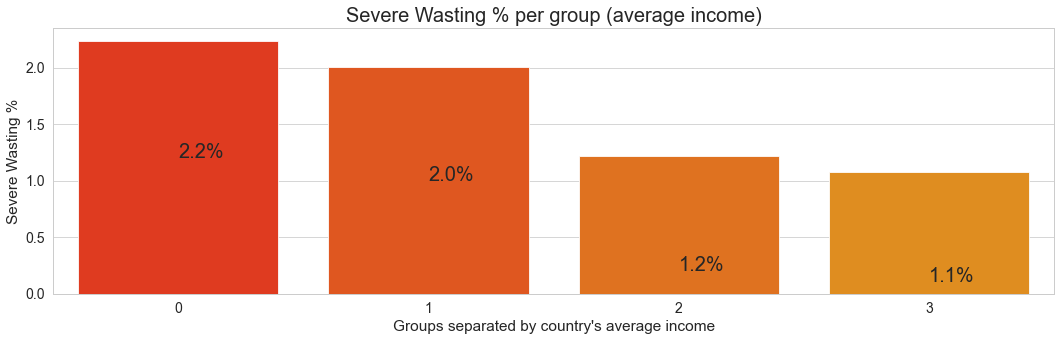

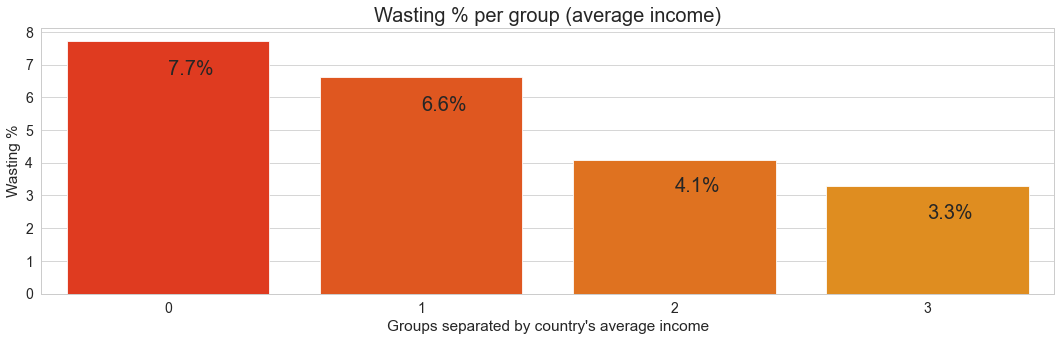

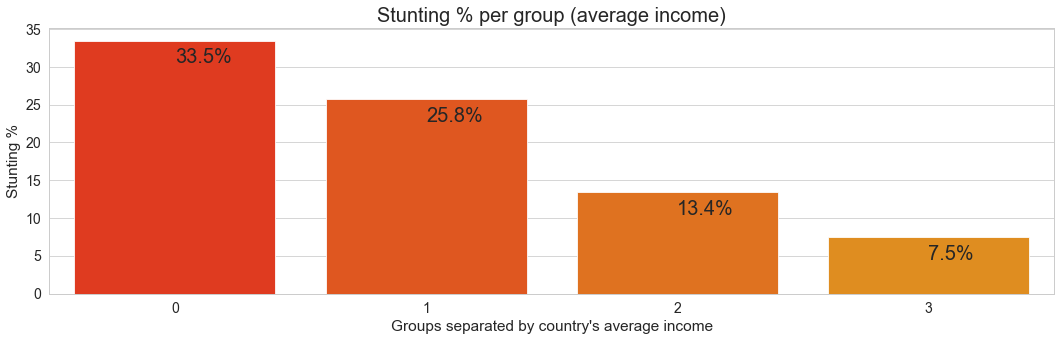

In [23]:
inc_clas = [0, 1, 2, 3]
plt.figure(figsize=(15, 5))
x = df1.groupby(by=['Income Classification'])[['Severe Wasting']].mean()
sns.set_theme(style='whitegrid', palette='autumn')
sns.set_context('paper', font_scale = 1.6)
ax = sns.barplot(x=inc_clas, y=x['Severe Wasting'])
plt.title('Severe Wasting % per group (average income)', fontsize=20)
ax.set_xlabel("Groups separated by country's average income")
ax.set_ylabel('Severe Wasting %')
menMeans = [2.2, 2.0, 1.2, 1.1]
for index,data in enumerate(menMeans):
    plt.text(x=index , y =data-1 , s=f"{data}%" , fontdict=dict(fontsize=20))
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
x = df1.groupby(by=['Income Classification'])[['Wasting']].mean()
sns.set_theme(style='whitegrid', palette='autumn')
sns.set_context('paper', font_scale = 1.6)
ax = sns.barplot(x=inc_clas, y=x['Wasting'])
plt.title('Wasting % per group (average income)', fontsize=20)
ax.set_xlabel("Groups separated by country's average income")
ax.set_ylabel('Wasting %')
menMeans = [7.7, 6.6, 4.1, 3.3]
for index,data in enumerate(menMeans):
    plt.text(x=index , y =data-1 , s=f"{data}%" , fontdict=dict(fontsize=20))
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
x = df1.groupby(by=['Income Classification'])[['Stunting']].mean()
sns.set_theme(style='whitegrid', palette='autumn')
sns.set_context('paper', font_scale = 1.6)
ax = sns.barplot(x=inc_clas, y=x['Stunting'])
plt.title('Stunting % per group (average income)', fontsize=20)
ax.set_xlabel("Groups separated by country's average income")
ax.set_ylabel('Stunting %')
menMeans = [33.5, 25.8, 13.4, 7.5]
for index,data in enumerate(menMeans):
    plt.text(x=index , y =data-3 , s=f"{data}%" , fontdict=dict(fontsize=20))
plt.tight_layout()
plt.show()

Based on these graphs:
- The **average income has a large correlation with the nutrition situation of a country**;
- On average, **1/3 of children between 0 and 59 months old of countries with a Low Income (Income Classification = 0) suffer from stunting**;
- While countries with High Income (Income Classification = 3) presented that 1,1% of its children suffer from Severe Wasting, countries with Low Income (Income Classification = 0) registered that, on average, 2,2% of the same group of people suffer from Severe Wasting. Given the disparity between the socioeconomical situations, one could expect a bigger difference between the two groups. Such behavior may have been caused by a larger social inequality ratio on countries with High Income.

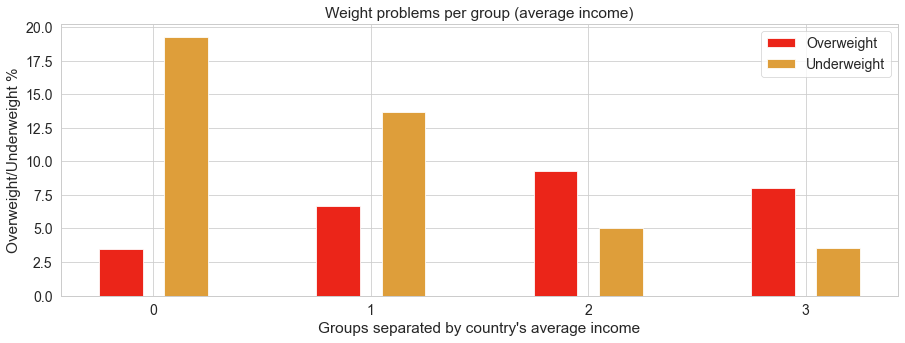

In [24]:
plt.figure(figsize=(15, 5))
x = df1.groupby(by=['Income Classification'])[['Overweight', 'Underweight']].mean()
x_arange = np.arange(0, len(x.index))
plt.bar(x_arange-0.15, x['Overweight'], width=.2, label='Overweight', color='#EB2519')
plt.bar(x_arange, x['Overweight']*0, width=.2)
plt.bar(x_arange+0.15, x['Underweight'], width=.2, label='Underweight', color='#DE9E3A')
plt.ylabel('Overweight/Underweight %')
plt.xlabel("Groups separated by country's average income")
plt.title('Weight problems per group (average income)')
plt.legend()
plt.xticks([0, 1, 2, 3]);

As expected, it is possible to see a pattern that **with the increase of average income, countries tend to have an increase in their overweight population and a decrease in their underweight population**. This behavior is probably caused by the bigger purchasing power that allows these children to be better fed.


However, the **group of High Income countries presented a smaller number of overweight children**. This phenomenon is probably caused by the optimal social economical conditions in said countries that allow **healthier and more controlled feeding habits**.

### Unfortunately...
- GitHub performs a static render of the notebooks, that **doesn't allow the display of plotly's interactive graphs**.
- **PNG render** will be used so the graphs can be visualized as static figures. 

**The interactive graph's codes will be presented on the same cell as comments**.

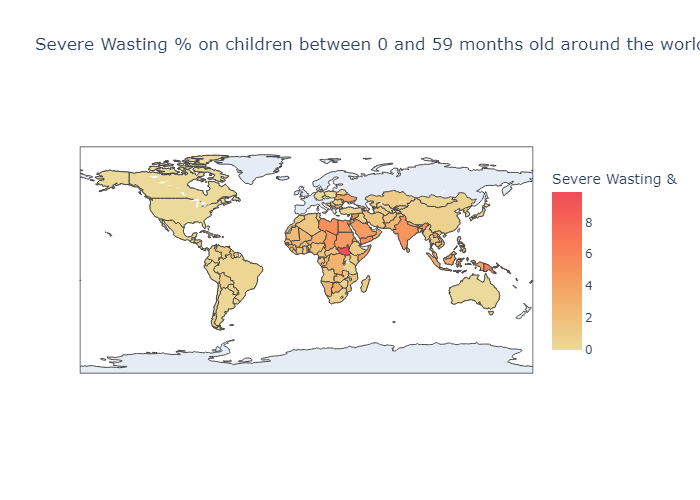

In [25]:
x = df1.groupby(["Country"])["Severe Wasting"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'oryel',
            text= x.index,
            z=x,
            colorbar = {'title':'Severe Wasting &', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="Severe Wasting % on children between 0 and 59 months old around the world")
fig = go.Figure(data = [data],layout = layout)
fig.show(renderer="png")

'''''''''x = df1.groupby(["Country"])["Severe Wasting"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'oryel',
            text= x.index,
            z=x,
            colorbar = {'title':'Severe Wasting %', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="Severe Wasting % % on children between 0 and 59 months old around the world")
col_map = go.Figure(data = [data],layout = layout)
col_map.show()''''''''';

Countries and the following regions presented the highest indexes of severe wasting on children between 0 and 59 months old:
- Northeast Africa
- South Sudan
- India
- Papua New Guinea
- Siria
- Djibouti
- Yemen
- Somalia
- Saudi Arabia

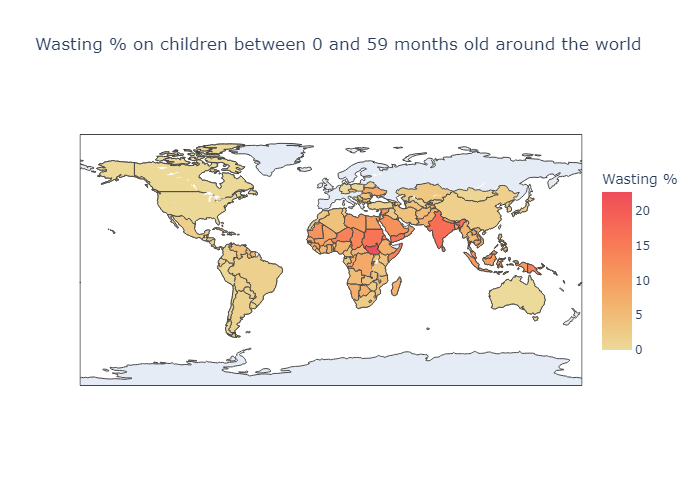

In [26]:
x = df1.groupby(["Country"])["Wasting"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'oryel',
            text= x.index,
            z=x,
            colorbar = {'title':'Wasting %', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="Wasting % on children between 0 and 59 months old around the world")
fig = go.Figure(data = [data],layout = layout)
fig.show(renderer="png")

'''''''''x = df1.groupby(["Country"])["Wasting"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'oryel',
            text= x.index,
            z=x,
            colorbar = {'title':'Wasting %', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="Wasting % on children between 0 and 59 months old around the world")
col_map = go.Figure(data = [data],layout = layout)
col_map.show()''''''''';

Countries and the following regions presented the highest indexes of wasting on children between 0 and 59 months old:
- Central África
- Northeast Africa
- India
- Papua New Guinea
- South Sudan
- Horn of Africa

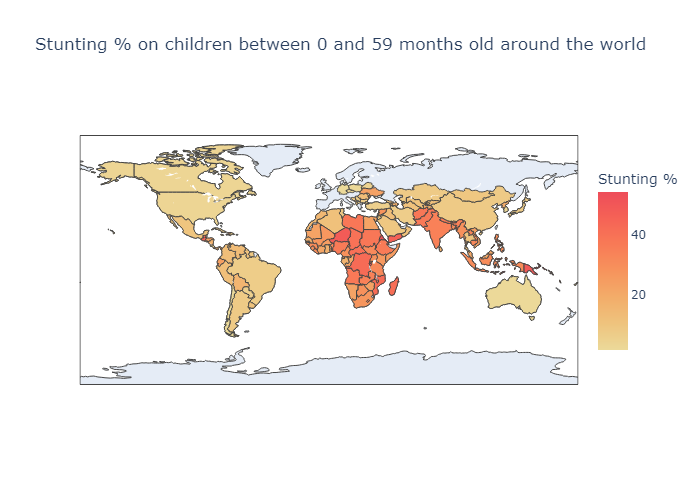

In [27]:
x = df1.groupby(["Country"])["Stunting"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'oryel',
            text= x.index,
            z=x,
            colorbar = {'title':'Stunting %', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="Stunting % on children between 0 and 59 months old around the world")
fig = go.Figure(data = [data],layout = layout)
fig.show(renderer="png")

'''''''''x = df1.groupby(["Country"])["Stunting"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'oryel',
            text= x.index,
            z=x,
            colorbar = {'title':'Stunting %', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="Stunting % on children between 0 and 59 months old around the world")
col_map = go.Figure(data = [data],layout = layout)
col_map.show()''''''''';

Countries and the following regions presented the highest indexes of stunting on children between 0 and 59 months old:
- Africa besides Central Magreb
- Guatemala
- Yemen
- Southeast Asia
- South Asia
- Afghanistan
- Papua New Guinea

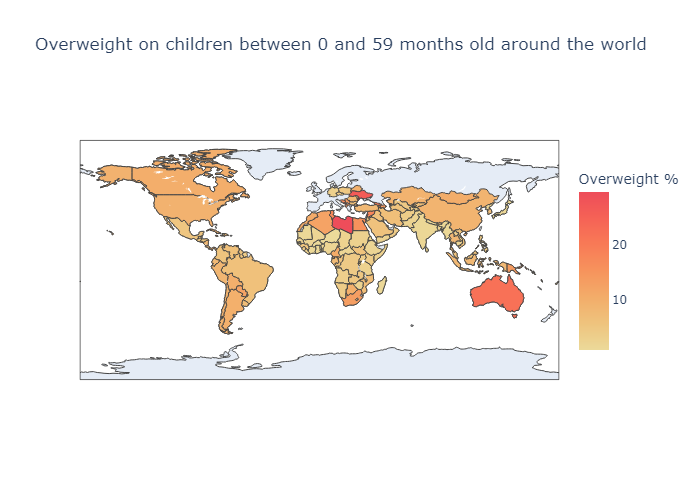

In [28]:
x = df1.groupby(["Country"])["Overweight"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'oryel',
            text= x.index,
            z=x,
            colorbar = {'title':'Overweight %', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="Overweight on children between 0 and 59 months old around the world")
fig = go.Figure(data = [data],layout = layout)
fig.show(renderer="png")

'''''''''x = df1.groupby(["Country"])["Overweight"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'oryel',
            text= x.index,
            z=x,
            colorbar = {'title':'Overweight %', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="Overweight % on children between 0 and 59 months old around the world")
col_map = go.Figure(data = [data],layout = layout)
col_map.show()''''''''';

Countries and the following regions presented the highest indexes of overweight children between 0 and 59 months old:
- North Africa
- Balkans
- Caucasus
- Australia
- Siria
- Ukraine
- Lebanon

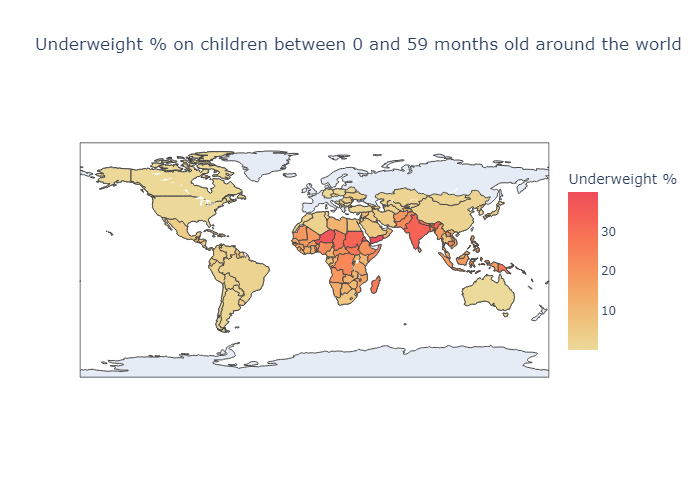

In [29]:
x = df1.groupby(["Country"])["Underweight"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'oryel',
            text= x.index,
            z=x,
            colorbar = {'title':'Underweight %', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="Underweight % on children between 0 and 59 months old around the world")
fig = go.Figure(data = [data],layout = layout)
fig.show(renderer="png")

'''''''''x = df1.groupby(["Country"])["Underweight"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'oryel',
            text= x.index,
            z=x,
            colorbar = {'title':'Underweight %', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="Underweight % on children between 0 and 59 months old around the world")
col_map = go.Figure(data = [data],layout = layout)
col_map.show()''''''''';

Countries and the following regions presented the highest indexes of underweight children between 0 and 59 months old:
- Central Africa
- Papua New Guinea
- South Asia
- Horn of Africa
- Madagascar

Out of curiosity, it is possible to check the **nutrition indexes of this dataset over time**. For this, the initial dataframe 'df' will be used.

In [30]:
ys = list(df.Year)
ys_set = set(ys)
ys = (list(ys_set))
ys.sort()

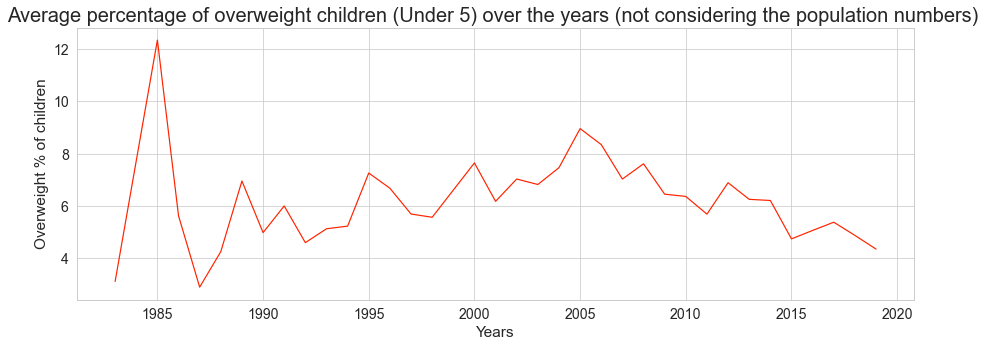

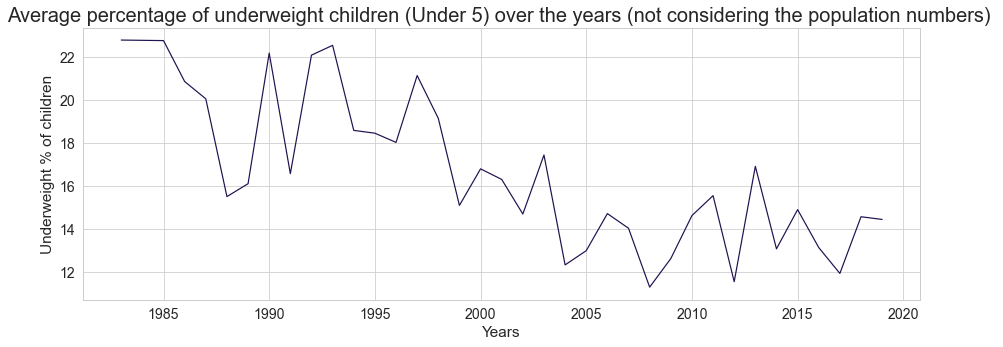

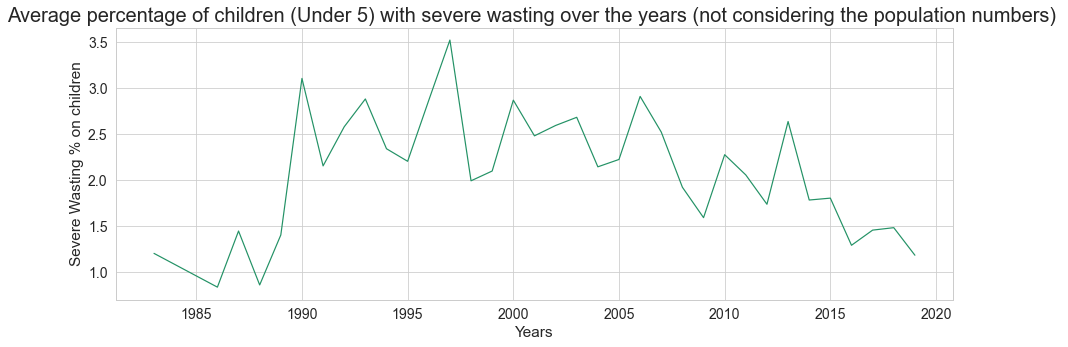

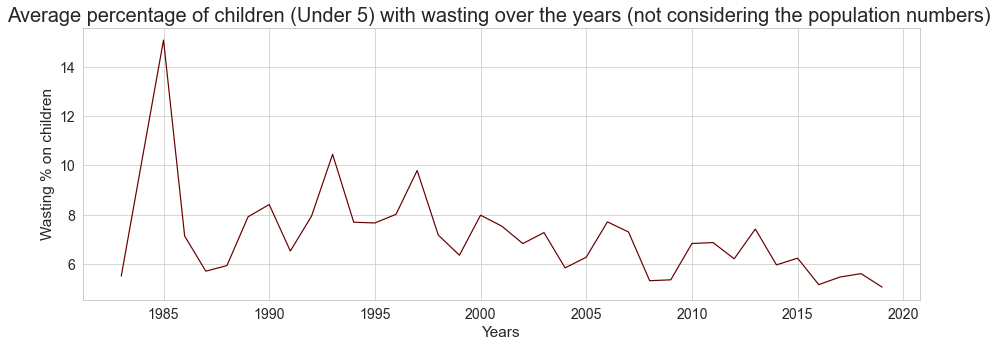

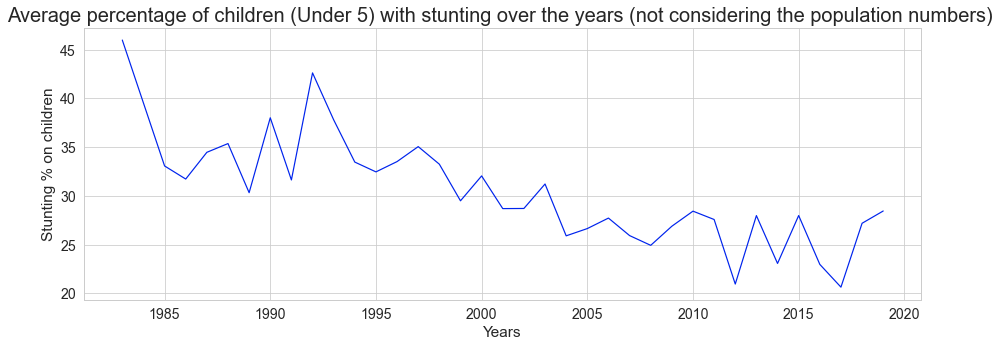

In [31]:
plt.figure(figsize=(15, 5))
x = df.groupby(by=['Year'])[['Overweight', 'Underweight', 'Stunting', 'Severe Wasting', 'Wasting']].mean()
sns.set_theme(style='whitegrid', palette='autumn')
sns.set_context('paper', font_scale = 1.6)
ax = sns.lineplot(x=ys, y=x['Overweight'])
plt.title('Average percentage of overweight children (Under 5) over the years (not considering the population numbers) ', fontsize=20)
ax.set_xlabel('Years')
ax.set_ylabel('Overweight % of children')

plt.figure(figsize=(15, 5))
sns.set_theme(style='whitegrid', palette='magma')
sns.set_context('paper', font_scale = 1.6)
ax = sns.lineplot(x=ys, y=x['Underweight'])
plt.title('Average percentage of underweight children (Under 5) over the years (not considering the population numbers) ', fontsize=20)
ax.set_xlabel('Years')
ax.set_ylabel('Underweight % of children')

plt.figure(figsize=(15, 5))
sns.set_theme(style='whitegrid', palette='summer')
sns.set_context('paper', font_scale = 1.6)
ax = sns.lineplot(x=ys, y=x['Severe Wasting'])
plt.title('Average percentage of children (Under 5) with severe wasting over the years (not considering the population numbers) ', fontsize=20)
ax.set_xlabel('Years')
ax.set_ylabel('Severe Wasting % on children')

plt.figure(figsize=(15, 5))
sns.set_theme(style='whitegrid', palette='hot')
sns.set_context('paper', font_scale = 1.6)
ax = sns.lineplot(x=ys, y=x['Wasting'])
plt.title('Average percentage of children (Under 5) with wasting over the years (not considering the population numbers) ', fontsize=20)
ax.set_xlabel('Years')
ax.set_ylabel('Wasting % on children')

plt.figure(figsize=(15, 5))
sns.set_theme(style='whitegrid', palette='winter')
sns.set_context('paper', font_scale = 1.6)
ax = sns.lineplot(x=ys, y=x['Stunting'])
plt.title('Average percentage of children (Under 5) with stunting over the years (not considering the population numbers) ', fontsize=20)
ax.set_xlabel('Years')
ax.set_ylabel('Stunting % on children');

#### It is important to note that the purpose of these graphs is not to have an idea of these numbers for the world population, since the absolute number of people is not taken into consideration and as not all countries are represented on this dataset. 

#### But rather have an idea about the evolution of these indexes over time,  so we can understand the betterment or the worsening of these values.

By the observation of these graphs, we can conclude:
- **Overweight**: 1985 registered a massive number of overweight children. After an increase between 1987 and 2005, the world average percentage of overweight children (Under 5) is decreasing.
- **Underweight**: In general terms, the percentage of underweight children (Under 5) decreased from the first records of the dataset until 2008. Since then, the numbers have been oscilating, presenting highs and lows.
- **Severe Wasting**: The severe wasting indexes increased, on average, from the first records of the dataset until 1997. Since then, they have been decreasing.
- **Wasting**: 1985 registered a peak of children (Under 5) that suffered from wasting.
- **Stunting**: The world average percentage of children (Under 5) that suffered from stunting before 1985 was significantly higher. In general terms, this indicator has decreased until 2008. Since then, the numbers have been oscilating, presenting highs and lows.

**Observations**:
- 1985 registered an atypical number of children (Under 5) that suffered from wasting and overweight.
- Until 2008, most of the indexes of the dataset decreased. Since then, these indicators have been oscilating with highs and lows. This behavior was possibly caused by the crisis of 2008 that caused social economical instability on most nations.

## Scaling features

In [32]:
X_o = df1.drop(columns=['Country', 'Year'])
X_o

,Income Classification,LDC,LIFD,LLDC or SID2,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
3,0,1.0,1.0,1.0,1.6,5.1,4.1,38.2,19.1,5601.443
8,2,0.0,0.0,0.0,0.5,1.6,16.4,11.3,1.5,176.522
15,2,0.0,0.0,0.0,1.4,4.1,12.4,11.7,3.0,4298.747
18,1,1.0,0.0,0.0,1.1,4.9,3.4,37.6,19.0,5192.358
22,2,0.0,0.0,0.0,0.2,1.6,10.0,7.9,1.7,3741.882
...,...,...,...,...,...,...,...,...,...,...
876,2,0.0,0.0,0.0,1.0,4.1,6.4,13.4,2.9,2891.898
898,1,0.0,1.0,0.0,1.2,5.8,5.9,23.8,13.4,7743.873
905,0,1.0,1.0,0.0,5.4,16.4,2.5,46.4,39.9,3836.334
913,1,1.0,0.0,1.0,1.5,4.2,5.2,34.6,11.8,2868.914


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_esc = scaler.fit_transform(X_o)
X = pd.DataFrame(X_esc, index=X_o.index, columns=X_o.columns)
X

,Income Classification,LDC,LIFD,LLDC or SID2,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
3,-1.481203,1.494671,1.407264,0.516738,-0.026427,-0.090391,-0.590489,1.367097,0.942993,0.112081
8,0.593846,-0.669043,-0.710599,-0.750104,-0.706204,-0.893192,1.795460,-0.705651,-0.957486,-0.325414
15,0.593846,-0.669043,-0.710599,-0.750104,-0.150023,-0.319762,1.019542,-0.674829,-0.795513,0.007024
18,-0.443678,1.494671,-0.710599,-0.750104,-0.335416,-0.136265,-0.726275,1.320864,0.932195,0.079090
22,0.593846,-0.669043,-0.710599,-0.750104,-0.891597,-0.893192,0.553991,-0.967634,-0.935889,-0.037884
...,...,...,...,...,...,...,...,...,...,...
876,0.593846,-0.669043,-0.710599,-0.750104,-0.397214,-0.319762,-0.144336,-0.543838,-0.806311,-0.106432
898,-0.443678,-0.669043,1.407264,-0.750104,-0.273618,0.070170,-0.241326,0.257522,0.327497,0.284858
905,-1.481203,1.494671,1.407264,-0.750104,2.321893,2.501512,-0.900857,1.998938,3.189014,-0.030267
913,-0.443678,1.494671,-0.710599,0.516738,-0.088225,-0.296825,-0.377112,1.089703,0.154726,-0.108285


## Determining the number of clusters

In [34]:
from sklearn.cluster import KMeans

n_clusts = range(2, 15)
inercias = []
for n_clus in n_clusts:
    print(n_clus)
    km = KMeans(n_clusters=n_clus, n_init=200, max_iter=3000)
    km.fit(X)
    inercias.append( km.inertia_ )
    
inercias;

2
3
4
5
6
7
8
9
10
11
12
13
14


### Elbow method

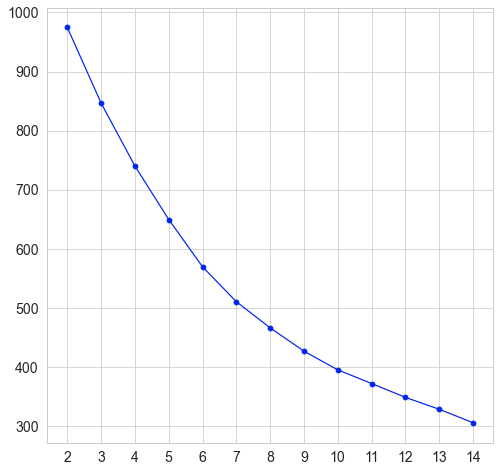

In [35]:
plt.figure(figsize=(8, 8))
plt.plot(n_clusts, inercias, 'o-')
plt.xticks(n_clusts)
plt.grid(visible=True)

By the elbow graph, the **optimal number of clusters is 5 or 6**.

### Silhouette method

Average silhouette with N= 2:  0.353
Average silhouette with N= 3:  0.327
Average silhouette with N= 4:  0.331
Average silhouette with N= 5:  0.243
Average silhouette with N= 6:  0.264
Average silhouette with N= 7:  0.289
Average silhouette with N= 8:  0.298
Average silhouette with N= 9:  0.299
Average silhouette with N=10:  0.270


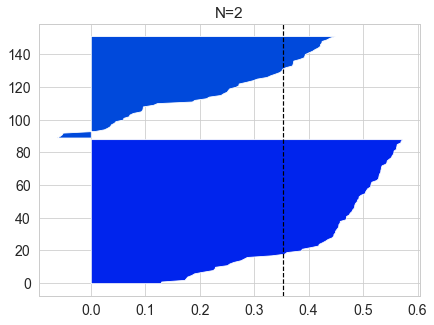

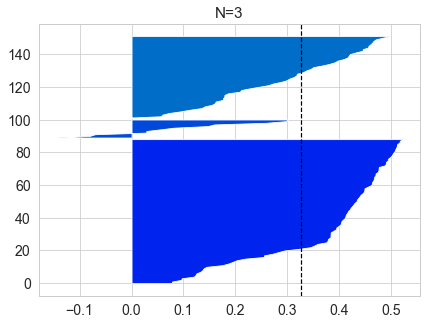

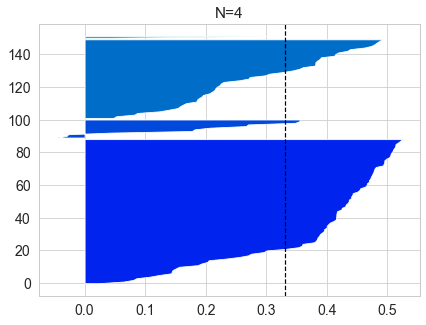

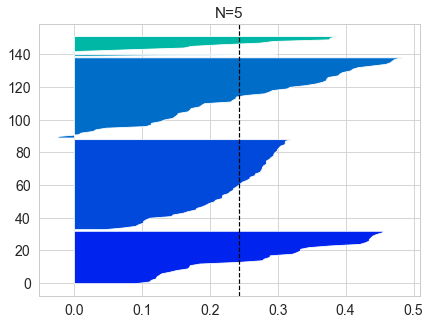

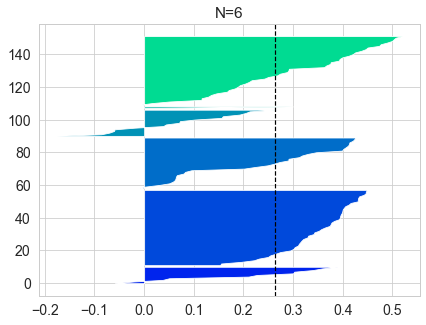

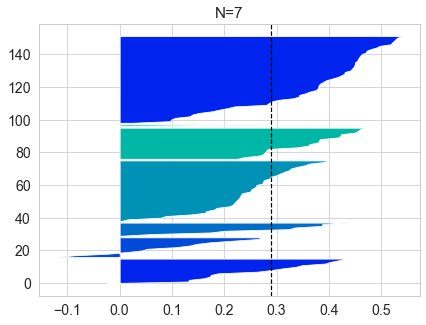

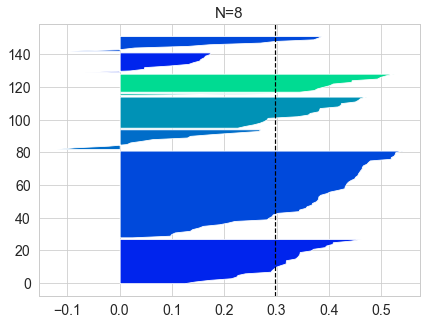

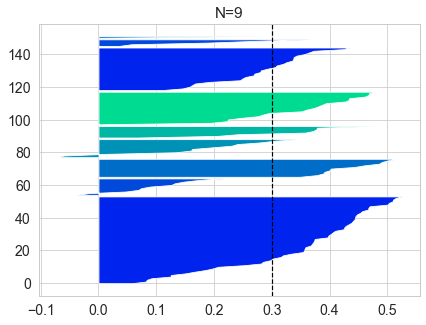

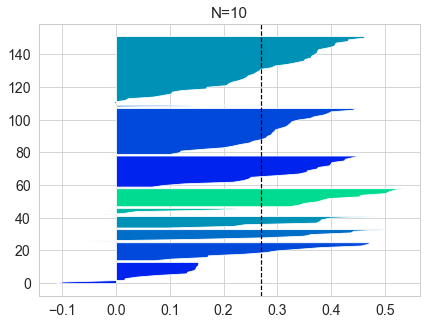

In [36]:
from sklearn.metrics import silhouette_score, silhouette_samples

def plota_centros(df, km, ax):
    n_clusters = km.n_clusters

silhuetas_medias = []
for n_clust in range(2, 10+1):
    km = KMeans(n_clusters=n_clust,
                init='k-means++',
                n_init=100,
                max_iter=1_000,
                random_state=1,
               )
    km.fit(X)
    clusts = km.predict(X)
    df_clust = X.copy()
    df_clust.loc[:,'cluster'] = clusts
    
    silhuetas_medias.append( silhouette_score(X, clusts) )
    print(f'Average silhouette with N={n_clust:2d}: {silhuetas_medias[-1]:6.3f}')
    
    silhuetas_amostras = silhouette_samples(X, clusts)
    
    plt.figure(figsize=(15, 5))
    
    y_lower = 0
    for i in range(n_clust):
        s_clust = np.sort( silhuetas_amostras[clusts==i] )
        
        plt.subplot(1,2,1)
        plt.title(f'N={n_clust}')
        plt.fill_betweenx(np.arange(y_lower,y_lower+s_clust.shape[0]),0,s_clust)
        y_lower = y_lower + s_clust.shape[0]

        
    plt.subplot(1,2,1)
    plt.axvline(silhuetas_medias[-1],color='k',linestyle='--')
    
inercias;

Given the silhouette graphs, it was decided that the **dataset will be divided into 5 clusters**.
- For a division of this dataset into 6 groups, the silhouette values of the 2nd cluster (from top to bottom) were really low and/or negative. This means that the points are close to the bordering region between 2 clusters and/or closer to other groups, which can cause this division to agregate samples that are fairly different into the same group.
- Also, besides 1 group from the 5 cluster division, the volumetry of said separation (n=5) is more stable than grouping this dataset into 6 different clusters (n=6).

## Training the model

In [37]:
n_clust = 5
km = KMeans(n_clusters=n_clust, n_init=200, max_iter=3000, random_state=2021)
km.fit(X)

df1.loc[:, 'Cluster'] = km.predict(X)
df1

,Country,Year,Income Classification,LDC,LIFD,LLDC or SID2,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s),Cluster
3,AFGHANISTAN,2018,0,1.0,1.0,1.0,1.6,5.1,4.1,38.2,19.1,5601.443,2
8,ALBANIA,2017,2,0.0,0.0,0.0,0.5,1.6,16.4,11.3,1.5,176.522,0
15,ALGERIA,2012,2,0.0,0.0,0.0,1.4,4.1,12.4,11.7,3.0,4298.747,0
18,ANGOLA,2015,1,1.0,0.0,0.0,1.1,4.9,3.4,37.6,19.0,5192.358,2
22,ARGENTINA,2019,2,0.0,0.0,0.0,0.2,1.6,10.0,7.9,1.7,3741.882,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,VENEZUELA (BOLIVARIAN REPUBLIC OF),2009,2,0.0,0.0,0.0,1.0,4.1,6.4,13.4,2.9,2891.898,0
898,VIET NAM,2017,1,0.0,1.0,0.0,1.2,5.8,5.9,23.8,13.4,7743.873,2
905,YEMEN,2013,0,1.0,1.0,0.0,5.4,16.4,2.5,46.4,39.9,3836.334,1
913,ZAMBIA,2018,1,1.0,0.0,1.0,1.5,4.2,5.2,34.6,11.8,2868.914,2


In [38]:
df1.Cluster.value_counts()

0    56
2    49
4    33
1    12
3     2
Name: Cluster, dtype: int64

Even though the 1st and 3rd clusters have a lower volume than others, while testing different number of clusters for the model, the volumetry continued to be discrepant. Moreover, cluster 3 contains countries such as India and China that are extremely unique in regards to their social economical, geographical and population conditions.

## Interpreting the clusters

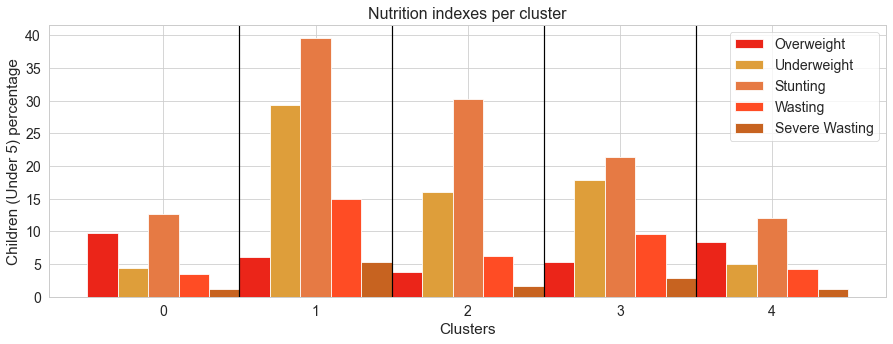

In [39]:
plt.figure(figsize=(15, 5))
x = df1.groupby(by=['Cluster'])[['Overweight', 'Underweight', 'Stunting', 'Severe Wasting', 'Wasting']].mean()
x_arange = np.arange(0, len(x.index))
plt.bar(x_arange-0.4, x['Overweight'], width=.2, label='Overweight', color='#EB2519')
plt.bar(x_arange-0.2, x['Underweight'], width=.2, label='Underweight', color='#DE9E3A')
plt.bar(x_arange, x['Stunting'], width=.2, label='Stunting', color='#E67A44')
plt.bar(x_arange+0.2, x['Wasting'], width=.2, label='Wasting', color='#FF4C24')
plt.bar(x_arange+0.4, x['Severe Wasting'], width=.2, label='Severe Wasting', color='#C76320')
plt.axvline(x=0.5, ymin=0, ymax=50, color='k')
plt.axvline(x=1.5, ymin=0, ymax=50, color='k')
plt.axvline(x=2.5, ymin=0, ymax=50, color='k')
plt.axvline(x=3.5, ymin=0, ymax=50, color='k')
plt.ylabel('Children (Under 5) percentage')
plt.xlabel('Clusters')
plt.title('Nutrition indexes per cluster', fontsize=16)
plt.legend()
plt.xticks([0, 1, 2, 3, 4]);

- Cluster 0 seems to be the richest. > overweight ratio and < ratio for other indexes.
- Cluster 1 seems to be the most affected by these issues. > malnutrition ratio indexes.
- Cluster 4 seems to be the 2nd least affected by these issues. Low malnutrition ratios, but higher ratios than cluster 0.
- Clusters 2 and 3 are intermediate. Group 3 showed higher ratios of children affected by wasting or underweight, while group 2 presented a larger presence of children that suffer from stunting.

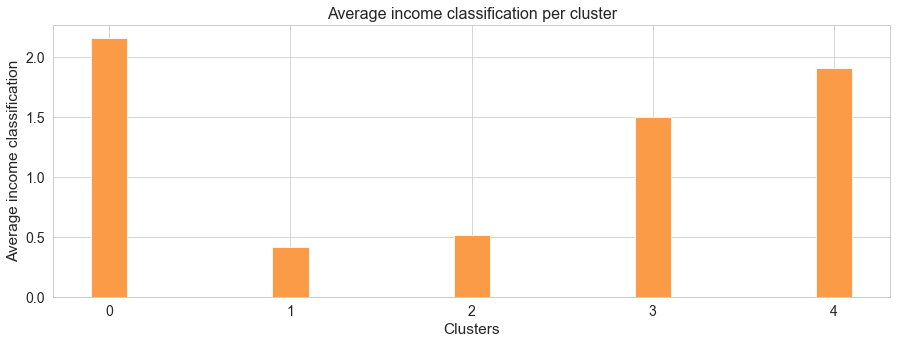

In [40]:
plt.figure(figsize=(15, 5))
x = df1.groupby(by=['Cluster'])[['Income Classification']].mean()
plt.bar([0, 1, 2, 3, 4], x['Income Classification'], width=.2, color='#FC9B47')
plt.ylabel('Average income classification')
plt.xlabel('Clusters')
plt.title('Average income classification per cluster', fontsize=16)
plt.xticks([0, 1, 2, 3, 4]);

- Cluster 0 has the highest average income. The mean value of the group is over 2, that is somewhere between Upper-Middle Income and High Income;
- Clusters 1 and 2 have the lowest average incomes of the dataset, while group 2 has a mean value of 0.5, group 1 presents a number even lower than that. This means that the majority of countries that compose these clusters has registered Low Income or Lower-Middle Income indexes;
- Cluster 3 presented an average value of 1.5, which means that it is mostly composed by Lower-Middle Income and Upper-Middle Income countries;
- Cluster 4 recorded an average value slightly below 2. This means that the group registered a considerable amount of countries with Upper-Middle Income indexes.

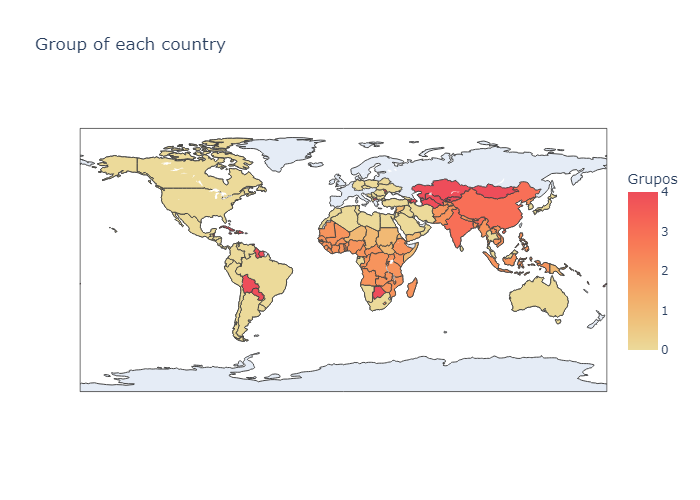

In [41]:
x = df1.groupby(["Country"])["Cluster"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'oryel',
            text= x.index,
            z=x,
            colorbar = {'title':'Grupos', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="Group of each country")
fig = go.Figure(data = [data],layout = layout)
fig.show(renderer="png")

'''''''''x = df1.groupby(["Country"])["Cluster"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'oryel',
            text= x.index,
            z=x,
            colorbar = {'title':'Grupos', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="Grupo de cada país")
col_map = go.Figure(data = [data],layout = layout)
col_map.show()''''''''';

Observations:
- Cluster 0 is composed by the majority of countries from the dataset and include more 'developed' countries, such as Canada, Japan, Germany and Australia.
- Cluster 1 is composed by countries from the Horn of Africa, Levant and Central-North Africa, besides Papua New Guinea, that registered alarming nutrition indexes.
- Cluster 2 is composed by most contries from South Asia, West Africa, Southeast Asia and Southern Africa, such as Pakistan, Ghana, Angola and Indonesia.
- Cluster 3 is composed only by India and China, asian countries with large territorial extensions, numerous population and troublesome social economical inequalities.
- Cluster 4 is mainly composed by countries from Central Asia and poorer countries from Latin America and Europe, such as Bolivia, Guyana and Moldova. Also this group presents a considerable amount of small island states, such as Fiji and Belize.

In [42]:
df1.groupby('Cluster')['LDC', 'LIFD', 'LLDC or SID2', "U5 Population ('000s)"].agg(['mean'])

,LDC,LIFD,LLDC or SID2,U5 Population ('000s)
,mean,mean,mean,mean
Cluster,,,,
0,0.000000,0.017857,0.000000,2683.670446
1,0.833333,0.833333,0.750000,2120.195000
2,0.734694,0.755102,0.571429,5058.986531
3,0.000000,0.500000,0.000000,101444.923500
4,0.030303,0.060606,1.606061,414.014576


On average:
- Countries from clusters number 1 and 2 presented LDCs (Least Developed Countries) close to 1 . Moreover, these countries showed higher LIFDs (Low Income Food Deficient). This way, it is possible to affirm that **clusters 1 and 2 have the biggest social economical problems**, with group 1 having an even more aggravated issue.
- **Cluster 4** presented a high 'LLDC or SID2' index, which means that **it is composed by a lot of small island developing states**. Also, the average Under 5 population is lower in regards to the other groups, which confirms this assumption, as most islands tend to be smaller, more remote and with less numerous populations.
- **Cluster 0 and cluster 3 aren't composed by any Land Locked Developing Country or Small Island Developing States**.
- **Cluster 1** registered a 'LLDC or SID2' mean value close to 1. Therefore, this group probably has a **high incidence of developing countries**, mostly land locked nations or small island states.
- **Cluster 3 has a numerous Under 5 population**. This means that these countries have a high birth rate and possibly large populations.

## Identifying and naming the clusters

### - Cluster 0: Countries that, generally, don't suffer from malnutrition problems
Examples: United States of America, Germany, Czech Republic and Brazil

### - Cluster 1: Countries most affected by malnutrition problems
Examples: South Sudan, Siria, Papua New Guinea and Djibouti

### - Cluster 2: Countries with massive malnutrition problems
Examples: Uganda, Mali, Haiti and Ethiopia

### - Cluster 3: Asian giants
Examples: India and China

### - Cluster 4: Small Island/Coastal states and sparsely populated countries with large territorial extensions
Examples: Mongolia, Fiji, Cuba, Uzbekistan and Bolivia

## Given these factors, there must be established specific courses of action for the countries of each group:
- **Cluster 0**: It is important to monitor malnutrition indexes for future campaigns, but in general these countries' populations do not suffer from malnutrition problems. On the other hand, some nations from this group should establish initiatives in order to fight obesity.
- **Cluster 1**: Presents a huge problem in regards to nutrition and find itself in challenging socioeconomical conditions. It is necessary the urgent delivery of humanitarian aid. This group is mainly composed by under developed nations.
- **Cluster 2**: Countries with scarce financial resources and with massive nutrition problems, mainly located in Africa. Although these nations show better indexes than cluster 1, they could also benefit from humanitarian relief, as their populations are living under alarming malnutrition conditions.
- **Cluster 3**: These countries are massive in regards to land mass and present the two biggest world populations. Besides the huge socioeconomical inequalities, their enormous Under 5 population present a challenge for these nations' logistical solutions. The countries that compose this cluster must allocate a considerable amount of resources in an effort to stabilize their nutrition issues going forward. 
- **Cluster 4**: Given that this group is composed by several countries with small populations that are geographically concentrated, the social initiatives must be implemented with assertiveness and precision. This matter brings opportunity for future campaigns (easier and larger reach), but also challenges such as the management of natural (countries with large territorial extension, but sparsely populated usually tend to have little arable land) and financial resources (group composed mostly by developing or under developed nations) to feed their populations.